In [3]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import load_model


In [1]:
train_dir = 'dog vs cat/train'
test_dir = 'dog vs cat/test'


In [4]:
img_size = 150
batch_size = 32

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    zoom_range=0.2,
    shear_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # 80% train, 20% val from the train folder
)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='binary',
    subset='training'
)

val_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='binary',
    subset='validation'
)


Found 16000 images belonging to 2 classes.
Found 4000 images belonging to 2 classes.


In [5]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_size, img_size, 3)),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Binary output
])

model.compile(loss='binary_crossentropy',
              optimizer=Adam(learning_rate=1e-4),
              metrics=['accuracy'])

model.summary()


c:\Users\Lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    18,940,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,034,177 (72.61 MB)

 Trainable params: 19,034,177 (72.61 MB)

 Non-trainable params: 0 (0.00 B)

In [6]:
print(train_generator.class_indices)


{'cats': 0, 'dogs': 1}


In [ ]:
'''history = model.fit(
    train_generator,
    epochs=15,
    validation_data=val_generator
)'''


Epoch 1/15
500/500 ━━━━━━━━━━━━━━━━━━━━ 326s 652ms/step - accuracy: 0.6597 - loss: 0.6125 - val_accuracy: 0.7303 - val_loss: 0.5492
Epoch 2/15
500/500 ━━━━━━━━━━━━━━━━━━━━ 304s 607ms/step - accuracy: 0.7161 - loss: 0.5535 - val_accuracy: 0.7345 - val_loss: 0.5254
Epoch 3/15
500/500 ━━━━━━━━━━━━━━━━━━━━ 350s 699ms/step - accuracy: 0.7451 - loss: 0.5201 - val_accuracy: 0.7653 - val_loss: 0.4874
Epoch 4/15
500/500 ━━━━━━━━━━━━━━━━━━━━ 312s 623ms/step - accuracy: 0.7619 - loss: 0.4924 - val_accuracy: 0.7715 - val_loss: 0.4674
Epoch 5/15
500/500 ━━━━━━━━━━━━━━━━━━━━ 289s 577ms/step - accuracy: 0.7714 - loss: 0.4800 - val_accuracy: 0.7790 - val_loss: 0.4624
Epoch 6/15
500/500 ━━━━━━━━━━━━━━━━━━━━ 274s 547ms/step - accuracy: 0.7846 - loss: 0.4553 - val_accuracy: 0.7905 - val_loss: 0.4428
Epoch 7/15
500/500 ━━━━━━━━━━━━━━━━━━━━ 270s 539ms/step - accuracy: 0.7910 - loss: 0.4458 - val_accuracy: 0.7872 - val_loss: 0.4528
Epoch 8/15
500/500 ━━━━━━━━━━━━━━━━━━━━ 265s 529ms/step - accuracy: 0.7964 -

In [9]:
model.save("dogcat.h5")

In [10]:
model.save("dogcat.keras")

In [ ]:


#model = load_model("my_model.h5")


In [11]:
def predict_from_path(image_path, model, class_names, img_size=150):
    # Load and preprocess the image
    img = load_img(image_path, target_size=(img_size, img_size))
    img_array = img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    # Predict
    prediction = model.predict(img_array)[0][0]
    predicted_label = class_names[1] if prediction > 0.5 else class_names[0]
    confidence = prediction if prediction > 0.5 else 1 - prediction

    # Show result
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"Prediction: {predicted_label} ({confidence*100:.2f}%)")
    plt.show()


In [29]:
print(train_generator.class_indices)


{'cats': 0, 'dogs': 1}


In [14]:
class_names = list(train_generator.class_indices.keys())


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step


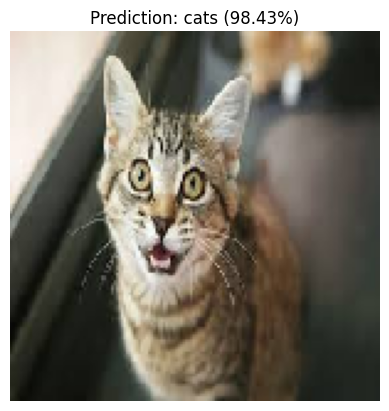

In [26]:
# Assuming you have already trained the model and have class_names from the generator
image_path = 'test10.png'  # Replace with your image filename
predict_from_path(image_path, model, class_names)
